In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv('prod_clust_sent.csv')
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,cluster,polarity,polarity_level,intensity,aspects
0,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.4640,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,Moisturizers,Moisturizers,0,53.792023,39.665802,0,0.208422,2.864000,0.600854,product
1,P442859,ALIVE Prebiotic Balancing Mask,6018,Algenist,14367,4.3729,118.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,Masks,Face Masks,0,53.792023,39.665802,0,0.245385,2.974359,0.694537,skin
2,P388262,GENIUS Ultimate Anti-Aging Eye Cream,6018,Algenist,6866,3.7759,116.0,0.5 oz/ 15 mL,Size,0.5 oz/ 15 mL,...,Eye Care,Eye Creams & Treatments,0,53.792023,39.665802,2,0.219617,2.853448,0.547828,eye
3,P457694,Blue Algae Vitamin C Dark Spot Correcting Peel,6018,Algenist,11488,4.2130,108.0,1.5 oz/ 45 mL,Size,1.5 oz/ 45 mL,...,Treatments,Facial Peels,0,53.792023,39.665802,5,0.185555,2.879630,0.645811,use
4,P447504,AA (Alguronic Acid) Barrier Serum,6018,Algenist,3877,3.9700,100.0,1 oz/ 30 mL,Size,1 oz/ 30 mL,...,Treatments,Face Serums,0,53.792023,39.665802,5,0.190836,2.878788,0.584623,thi


In [69]:
# Count rating, polarity and loves_count group by different brands
brand_stats = df.groupby("brand_name")[["rating", "polarity", "loves_count"]].mean().sort_values("rating", ascending=False)

# Top 10 brand
top_brands = brand_stats.head(10)
top_brands

,rating,polarity,loves_count
brand_name,,,
Erno Laszlo,5.000000,0.406122,664.000000
Gisou,4.947400,0.354673,547.000000
The Nue Co.,4.900000,0.308254,1693.500000
MACRENE actives,4.889420,0.267015,301.000000
MARA,4.817189,0.280806,1915.111111
alpyn beauty,4.797533,0.368831,4725.666667
Flora + Bast,4.736850,0.242397,2668.000000
DAMDAM,4.736400,0.428141,1646.000000
StriVectin,4.717284,0.264157,3634.263158


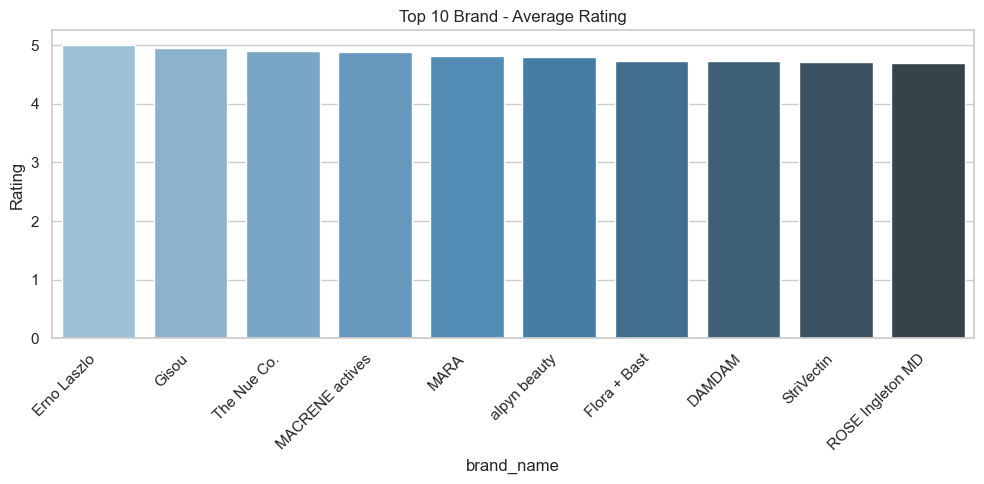

In [70]:
#Rating
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands['rating'], palette="Blues_d")
plt.title("Top 10 Brand - Average Rating")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top10_brand_rating.png")
plt.show()

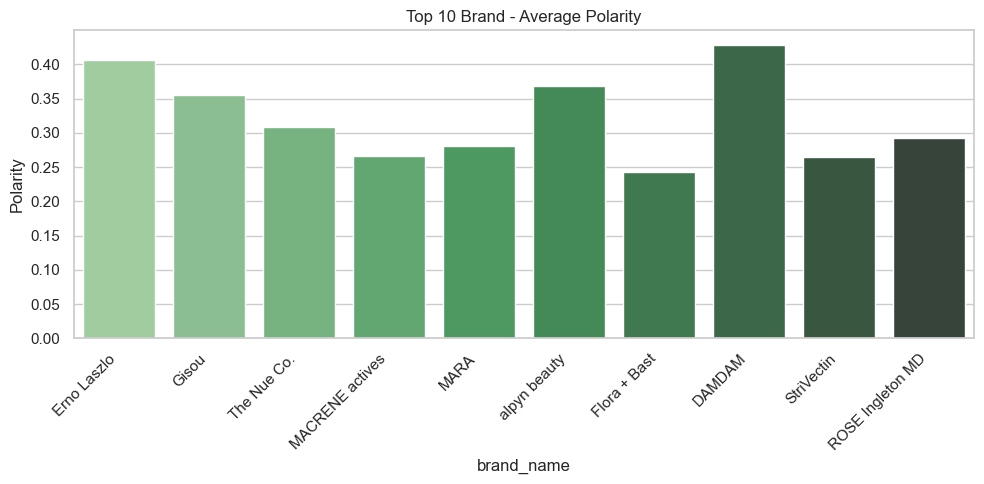

In [71]:
# Average Polarity
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands['polarity'], palette="Greens_d")
plt.title("Top 10 Brand - Average Polarity")
plt.ylabel("Polarity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top10_brand_polarity.png")
plt.show()

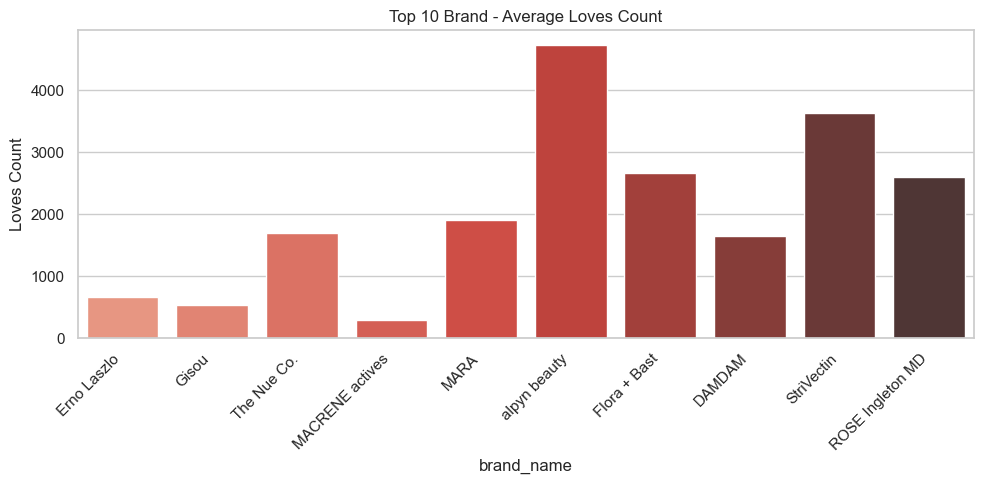

In [72]:
#Love counts
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands['loves_count'], palette="Reds_d")
plt.title("Top 10 Brand - Average Loves Count")
plt.ylabel("Loves Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top10_brand_loves.png")
plt.show()

In [73]:
df_filtered = df[df["secondary_category"] != "Shop by Concern"]

secondary_stats_filtered = df_filtered.groupby("secondary_category")[["rating", "polarity", "loves_count"]].mean()

print(secondary_stats_filtered)

                          rating  polarity   loves_count
secondary_category                                      
Cleansers               4.251825  0.264427   5930.000000
Eye Care                3.985678  0.223100   7646.250000
High Tech Tools         4.148078  0.225179   8354.859375
Lip Balms & Treatments  4.022740  0.249217   9209.900000
Masks                   4.149010  0.252920   8114.253012
Mini Size               3.959710  0.243522  11098.423077
Moisturizers            4.175365  0.267517   5892.739726
Self Tanners            3.913974  0.231006   6819.411765
Sunscreen               4.051781  0.271469   6319.021277
Treatments              4.244266  0.235526   6936.865031
Value & Gift Sets       4.095031  0.296077   9424.300000
Wellness                4.097671  0.227068   9569.236364


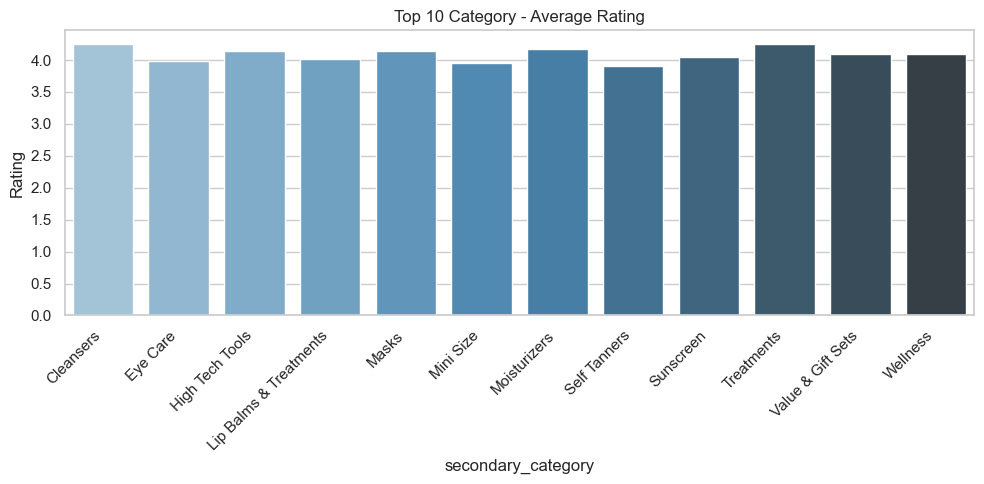

In [74]:
plt.figure(figsize=(10, 5))
sns.barplot(x=secondary_stats_filtered.index, y=secondary_stats_filtered['rating'], palette="Blues_d")
plt.title("Top 10 Category - Average Rating")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

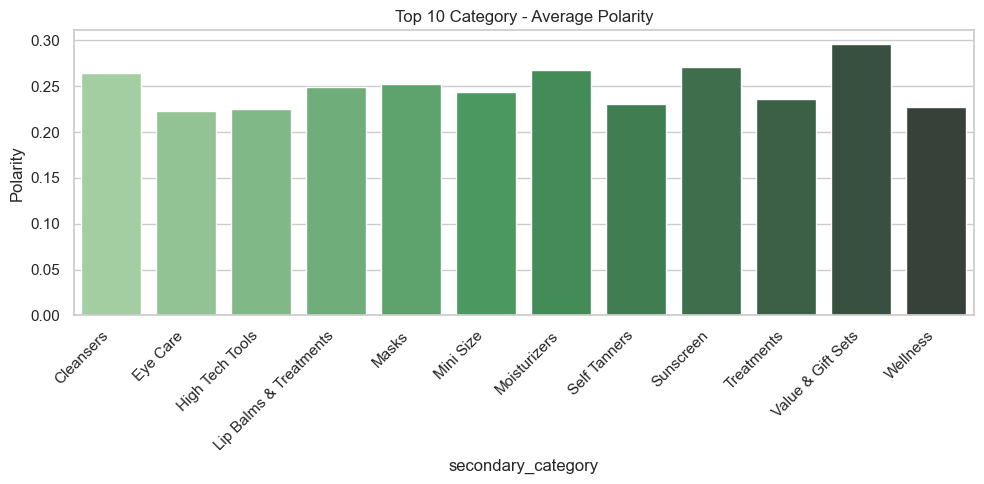

In [75]:
plt.figure(figsize=(10, 5))
sns.barplot(x=secondary_stats_filtered.index, y=secondary_stats_filtered['polarity'], palette="Greens_d")
plt.title("Top 10 Category - Average Polarity")
plt.ylabel("Polarity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

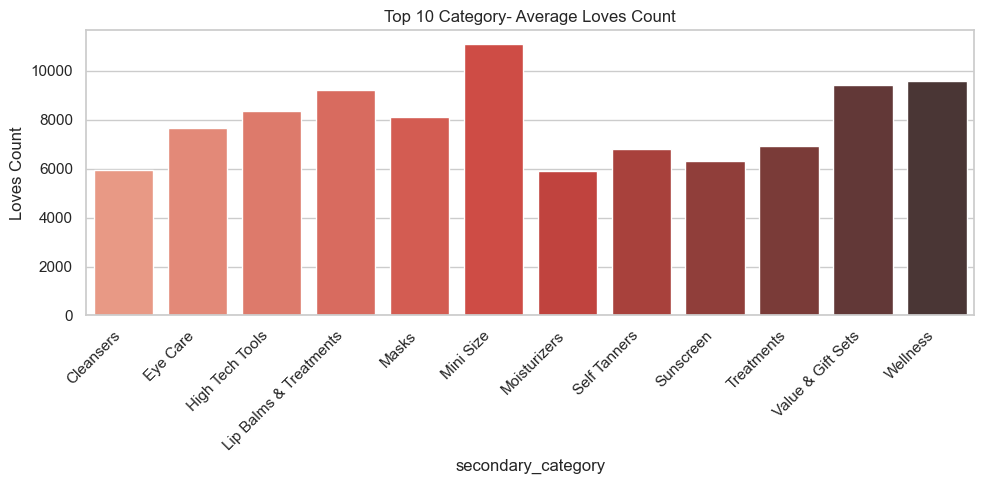

In [76]:
plt.figure(figsize=(10, 5))
sns.barplot(x=secondary_stats_filtered.index, y=secondary_stats_filtered['loves_count'], palette="Reds_d")
plt.title("Top 10 Category- Average Loves Count")
plt.ylabel("Loves Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [84]:
from collections import Counter
import re

top_products = df[(df['rating'] > 4.5) & (df['loves_count'] > 10000)]

clean_counter = Counter()

for h in top_products['highlights'].dropna():

    items = h.split(',')
    for item in items:
       
        cleaned = re.sub(r"[\[\]\'\"]", "", item).strip().lower()
        if re.search(r"[a-zA-Z]", cleaned):  
            clean_counter[cleaned] += 1

cleaned_highlights_df = pd.DataFrame(clean_counter.most_common(20), columns=['Highlight', 'Count'])

# 顯示結果
print(cleaned_highlights_df)

                            Highlight  Count
0                               combo     18
1                         normal skin     18
2   good for: dullness/uneven texture     16
3                    clean at sephora     15
4                   good for: dryness     15
5                        cruelty-free     13
6                               vegan     13
7                    without parabens     12
8                           hydrating     10
9                good for: anti-aging     10
10                    layerable scent      9
11                       floral scent      9
12                    hyaluronic acid      9
13                      best for oily      9
14            clean + planet positive      9
15                       best for dry      9
16         good for: loss of firmness      8
17                     fragrance free      8
18                    good for: pores      8
19                  aha/glycolic acid      6


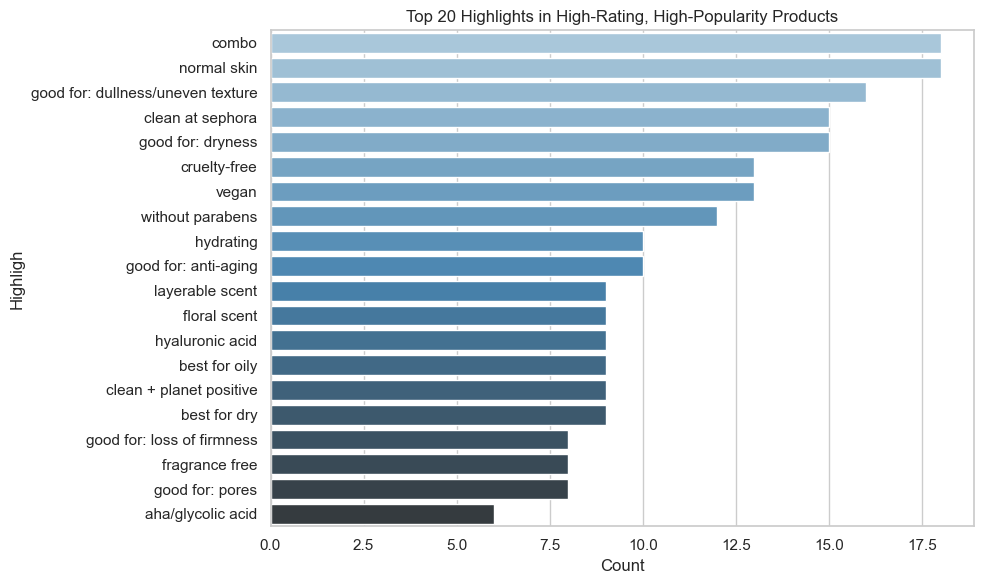

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Highlight', x='Count', data=cleaned_highlights_df, palette="Blues_d")
plt.title("Top 20 Highlights in High-Rating, High-Popularity Products")
plt.xlabel("Count")
plt.ylabel("Highligh")
plt.tight_layout()
plt.show()

In [79]:
secondary_counts = top_products['secondary_category'].value_counts()

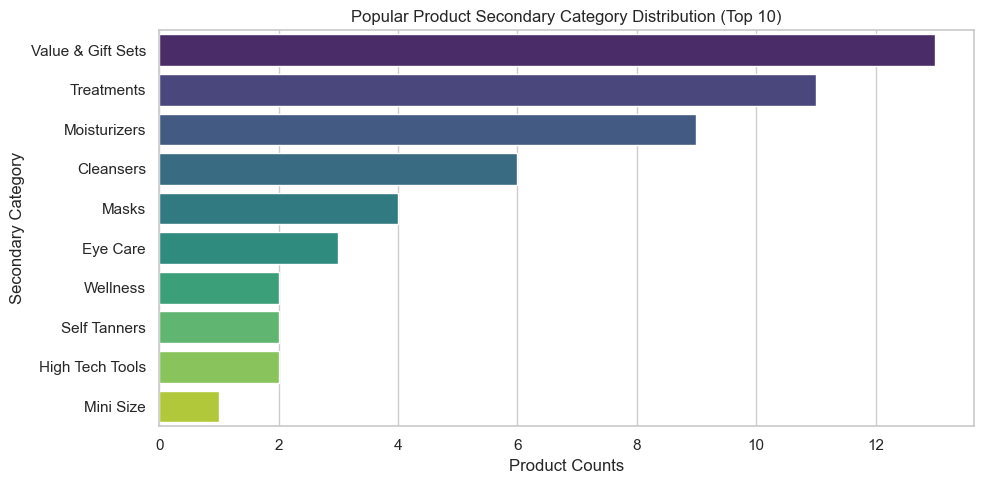

In [80]:
def plot_category_distribution(category_series, title, filename):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=category_series.head(10).values,
                y=category_series.head(10).index,
                palette="viridis")
    plt.title(title)
    plt.xlabel("Product Counts")
    plt.ylabel("Secondary Category")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
plot_category_distribution(secondary_counts,
                           "Popular Product Secondary Category Distribution (Top 10)",
                           "top_secondary_category.png")

In [81]:
from scipy.stats import ttest_ind

In [83]:
#The impact of three product tags (limited_edition, new, online_only) on evaluation (rating) and sentiment (polarity)

label_cols = ['limited_edition', 'new', 'online_only']
insight_lines = []

results = []

for label in label_cols:
    group_0 = df[df[label] == 0]
    group_1 = df[df[label] == 1]
    
    #Average
    avg_rating_0 = group_0['rating'].mean()
    avg_rating_1 = group_1['rating'].mean()
    avg_polarity_0 = group_0['polarity'].mean()
    avg_polarity_1 = group_1['polarity'].mean()

    #T-test
    ttest_rating = ttest_ind(group_0['rating'], group_1['rating'], equal_var=False)
    ttest_polarity = ttest_ind(group_0['polarity'], group_1['polarity'], equal_var=False)
    
    results.append({
        "Label": label,
        "Avg Rating (0)": avg_rating_0,
        "Avg Rating (1)": avg_rating_1,
        "Rating p-value": ttest_rating.pvalue,
        "Avg Polarity (0)": avg_polarity_0,
        "Avg Polarity (1)": avg_polarity_1,
        "Polarity p-value": ttest_polarity.pvalue
    })
    def sig(p): return "Significant difference" if p < 0.05 else " No significant difference"
    insight = (
        f"[{label}]\n"
        f"- Rating: {avg_rating_0:.3f} (unmarked) vs {avg_rating_1:.3f} (marked) → {sig(ttest_rating.pvalue)} (p={ttest_rating.pvalue:.4f})\n"
        f"- Sentiment: {avg_polarity_0:.3f} (untagged) vs {avg_polarity_1:.3f} (tagged) → {sig(ttest_polarity.pvalue)}(p={ttest_polarity.pvalue:.4f})\n"
    )
    insight_lines.append(insight)
    
df_result = pd.DataFrame(results)
df_result.to_csv("tag_rating_polarity_test.csv", index=False)

insight_text = "\n".join(insight_lines)
with open("tag_insights.txt", "w") as f:
    f.write(insight_text)
    
print(insight_text)

[limited_edition]
- Rating: 4.140 (unmarked) vs 4.115 (marked) →  No significant difference (p=0.7847)
- Sentiment: 0.253 (untagged) vs 0.292 (tagged) → Significant difference(p=0.0267)

[new]
- Rating: 4.103 (unmarked) vs 4.467 (marked) → Significant difference (p=0.0000)
- Sentiment: 0.252 (untagged) vs 0.283 (tagged) → Significant difference(p=0.0027)

[online_only]
- Rating: 4.098 (unmarked) vs 4.238 (marked) → Significant difference (p=0.0007)
- Sentiment: 0.254 (untagged) vs 0.260 (tagged) →  No significant difference(p=0.3232)

